# Introduction

This lab demonstrates how to use the GraphicalLasso estimator to learn a covariance and sparse precision from a small number of samples. The tutorial covers generating data, estimating the covariance, and plotting the results.

# Generate the Data

The first step is to generate the data. In this case, we are generating a small dataset of 60 samples with 20 features. We use a sparse inverse covariance matrix to ensure favorable recovery conditions.

In [1]:
import numpy as np
from scipy import linalg
from sklearn.datasets import make_sparse_spd_matrix

n_samples = 60
n_features = 20

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(
    n_features, alpha=0.98, smallest_coef=0.4, largest_coef=0.7, random_state=prng
)
cov = linalg.inv(prec)
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X -= X.mean(axis=0)
X /= X.std(axis=0)

# Estimate the Covariance

The second step is to estimate the covariance. We use GraphicalLassoCV to learn the sparse precision matrix. We also compare the results with Ledoit-Wolf estimator.

In [2]:
from sklearn.covariance import GraphicalLassoCV, ledoit_wolf

emp_cov = np.dot(X.T, X) / n_samples

model = GraphicalLassoCV()
model.fit(X)
cov_ = model.covariance_
prec_ = model.precision_

lw_cov_, _ = ledoit_wolf(X)
lw_prec_ = linalg.inv(lw_cov_)

# Plot the Results

The third step is to plot the results. We plot the covariances and the precisions. We also plot the model selection metric.

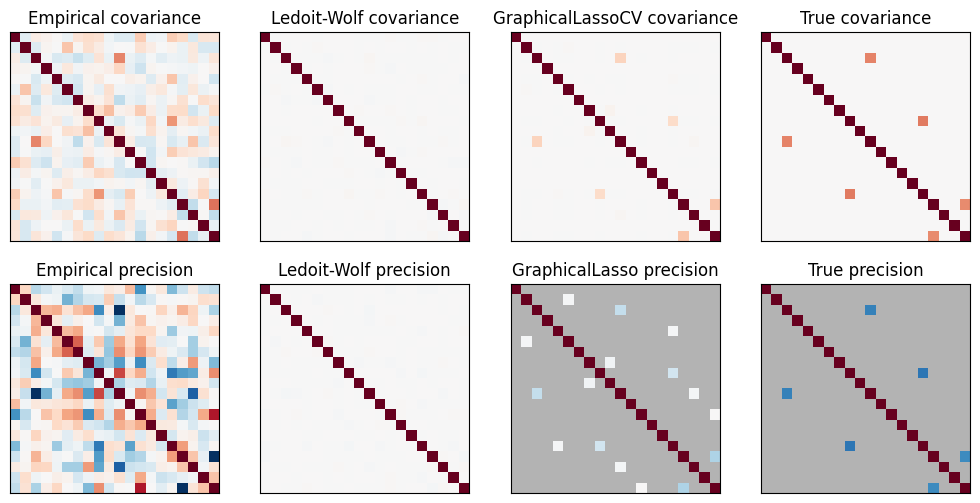

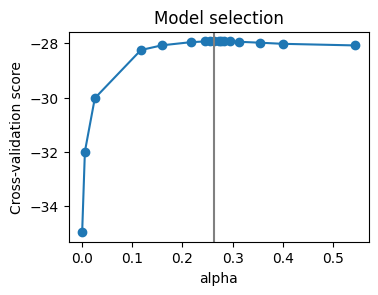

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)

# plot the covariances
covs = [
    ("Empirical", emp_cov),
    ("Ledoit-Wolf", lw_cov_),
    ("GraphicalLassoCV", cov_),
    ("True", cov),
]
vmax = cov_.max()
for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(
        this_cov, interpolation="nearest", vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu_r
    )
    plt.xticks(())
    plt.yticks(())
    plt.title("%s covariance" % name)


# plot the precisions
precs = [
    ("Empirical", linalg.inv(emp_cov)),
    ("Ledoit-Wolf", lw_prec_),
    ("GraphicalLasso", prec_),
    ("True", prec),
]
vmax = 0.9 * prec_.max()
for i, (name, this_prec) in enumerate(precs):
    ax = plt.subplot(2, 4, i + 5)
    plt.imshow(
        np.ma.masked_equal(this_prec, 0),
        interpolation="nearest",
        vmin=-vmax,
        vmax=vmax,
        cmap=plt.cm.RdBu_r,
    )
    plt.xticks(())
    plt.yticks(())
    plt.title("%s precision" % name)
    if hasattr(ax, "set_facecolor"):
        ax.set_facecolor(".7")
    else:
        ax.set_axis_bgcolor(".7")

# plot the model selection metric
plt.figure(figsize=(4, 3))
plt.axes([0.2, 0.15, 0.75, 0.7])
plt.plot(model.cv_results_["alphas"], model.cv_results_["mean_test_score"], "o-")
plt.axvline(model.alpha_, color=".5")
plt.title("Model selection")
plt.ylabel("Cross-validation score")
plt.xlabel("alpha")

plt.show()

# Summary

This lab demonstrated how to use the GraphicalLasso estimator to learn a covariance and sparse precision from a small number of samples. The tutorial covered generating data, estimating the covariance, and plotting the results.